In [4]:
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm as cmaps
from mpl_toolkits.axes_grid1 import make_axes_locatable

dimension = "2D2V"
R = [5, 10, 20, 40, 80]

# model = "Full"         # Full - fully kinetic PIC; Hybrid - Hybrid PIC
# steps = [49100*4, 49100*8, 49100*8]
# species = ["p", "e"]   # Full PIC usually have two species: p and e

model = "Hybrid"       # Full - fully kinetic PIC; Hybrid - Hybrid PIC
steps = [250*2, 250*4, 250*8, 250*16, 250*32]
gamma = 1           # For hybrid, an additional parameter is needed
species = ["p"]
M = 20

if model == "Full":
    dat_dirs = ["../../Data/{model}/{dimension}/R{R:g}".format(model=model, dimension=dimension, R=r) for r in R]
elif model == "Hybrid":
    dat_dirs = ["../../Data/{model}/{dimension}/Ma{M:g}/R{R:g}".format(model=model, dimension=dimension, M=M, R=r) for r in R]
else:
    raise Exception("Unknown model [{}]".format(model))

fields = []
for i, dat_dir in enumerate(dat_dirs):
    step = steps[i]
    dat_files = ["{}/number_density_{}_step{}.dat".format(dat_dir, s, step) for s in species]
    print("Loading data from {} ...".format(dat_files))
    fields.append([np.genfromtxt(dat_file) for dat_file in dat_files])

print("Loading data completed!")
print(np.shape(fields))

Loading data from ['../../Data/Hybrid/2D2V/Ma20/R5/number_density_p_step500.dat'] ...
Loading data from ['../../Data/Hybrid/2D2V/Ma20/R10/number_density_p_step1000.dat'] ...
Loading data from ['../../Data/Hybrid/2D2V/Ma20/R20/number_density_p_step2000.dat'] ...
Loading data from ['../../Data/Hybrid/2D2V/Ma20/R40/number_density_p_step4000.dat'] ...
Loading data from ['../../Data/Hybrid/2D2V/Ma20/R80/number_density_p_step8000.dat'] ...
Loading data completed!
(5, 1, 1025, 2049)


In [1]:
R = 287
g =1.4

p0 = 10e6
pb = [0.3e5, 0.01e5]
T0 = 800
sigma_e = 0.1
rho0 = p0/(R*T0)
c0 = sqrt(g*R*T0)
qm1 = 0.04042*p0/sqrt(T0)*sigma_e

for p in pb :
    p = p/p0
    qm2 = sigma_e*rho0*p**(1/1.4)*sqrt(2/0.4*c0*(1-p**(0.4/1.4))
    if qm2 > qm1 :
        qm = qm1
    else:
        qm = qm2
    print(qm)

SyntaxError: invalid syntax (<ipython-input-1-cee0ac887f4d>, line 15)

In [29]:
colors = ["k", "r", "b", "g", "y"]
linestyles = ["-", "-.", "--", ":", ":"]

In [12]:
normalized_by_R = True
n_screenout = 1e-6  # n = NAN if < n_screenout

ny, nx = fields[0][0].shape

dx = 1; dy = 1;

xlim = np.array([0, 50])
ylim = np.array([0, 5])

if normalized_by_R:
    nx_show = [r*xlim for r in R]
    ny_show = [r*ylim for r in R]
else:
    nx_show = xlim
    ny_show = ylim

if normalized_by_R:
    dx = [dx/r for r in R]
    dy = [dy/r for r in R]

x = []
y = []
X = []
Y = []
for i, r in enumerate(R):
    nx_show[i][-1] += 1
    ny_show[i][-1] += 1
        
    x.append(dx[i]*np.arange(nx))
    y.append(dy[i]*np.arange(ny))
    
    xm, ym = np.meshgrid(x[i],y[i])
    X.append(xm)
    Y.append(ym)

if normalized_by_R:
    xticks = np.arange(xlim[0], xlim[1]+0.01, 5)
    yticks = np.arange(ylim[0], ylim[1]+0.01, 5)
else:
    xticks = np.arange(xlim[0], xlim[1]+0.01, 50)
    yticks = np.arange(ylim[0], ylim[1]+0.01, 50)
    

[0.000e+00 2.000e-01 4.000e-01 ... 4.092e+02 4.094e+02 4.096e+02]
[0.000e+00 1.000e-01 2.000e-01 ... 2.046e+02 2.047e+02 2.048e+02]


In [17]:
fontsize_label=20
fontsize_tick=16

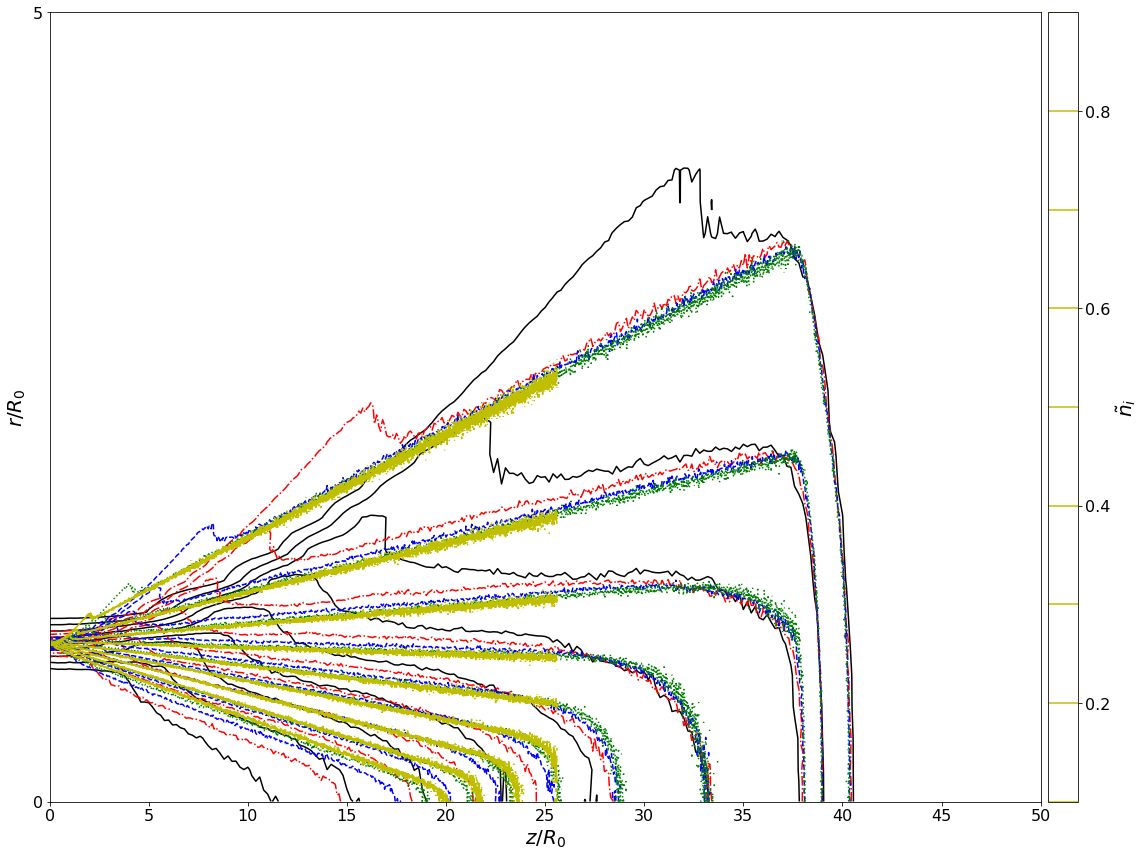

In [20]:
# ni
# fig, ax = plt.subplots(figsize=(8, 6))
fig, ax = plt.subplots(figsize=(16, 12))

value_min = 0
# value_max = 1.2
value_max = 1.0
value_step = 0.2

# value_levels = np.zeros(22)
# value_levels[0] = 1e-3
# value_levels[1] = 1e-2
# value_levels[2:-1] = np.arange(0.05, 0.951, 0.05)
# value_levels[-1] = 0.98

value_levels = np.arange(0.1, 1.0, 0.1)
cmap = plt.cm.get_cmap("jet")
cmap.set_over(cmaps.jet(255))

# ch = ax.contour(X[ny_show[0]:ny_show[1], nx_show[0]:nx_show[1]],
#                 Y[ny_show[0]:ny_show[1], nx_show[0]:nx_show[1]],
#                 fields[0][ny_show[0]:ny_show[1], nx_show[0]:nx_show[1]],
#                 value_levels, extend="max",  cmap=cmap, origin="lower")


for i, r in enumerate(R):
    ch = ax.contour(X[i][ny_show[i][0]:ny_show[i][1], nx_show[i][0]:nx_show[i][1]],
                    Y[i][ny_show[i][0]:ny_show[i][1], nx_show[i][0]:nx_show[i][1]],
                    fields[i][0][ny_show[i][0]:ny_show[i][1], nx_show[i][0]:nx_show[i][1]],
                    value_levels, colors=colors[i], linestyles=linestyles[i])

# ax.set_aspect(1)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)
cbar = plt.colorbar(ch, cax=cax)
cbar.set_label(label=r"$\tilde{n}_i$", fontsize=fontsize_label)
cbar.set_ticks(np.arange(value_min, value_max+value_step, value_step))
cbar.ax.tick_params(labelsize=fontsize_tick) 

ax.set_xticks(xticks)
ax.set_yticks(yticks)
if normalized_by_R:
    ax.set_xlabel(r"$z/R_0$", fontsize=fontsize_label)
    ax.set_ylabel(r"$r/R_0$", fontsize=fontsize_label)
else:
    ax.set_xlabel(r"$\tilde{z}$", fontsize=fontsize_label)
    ax.set_ylabel(r"$\tilde{r}$", fontsize=fontsize_label)
ax.tick_params(labelsize=fontsize_tick)

img_name = "Fig/ni_contour"
fig.tight_layout()
# plt.savefig(img_name+".eps", dpi=200)
# plt.savefig(img_name+".png", dpi=200)
plt.show()

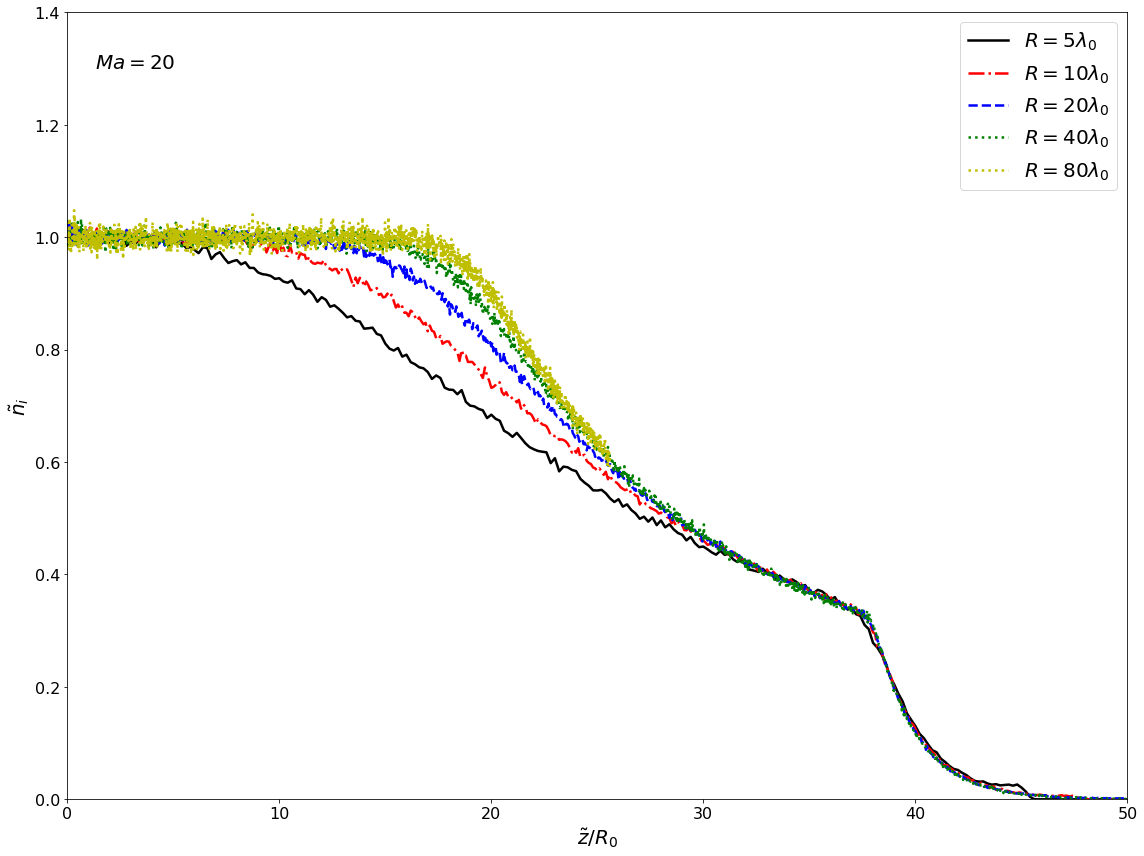

In [31]:
# ni along z=0: Ma = 20
fig, ax = plt.subplots(figsize=(16,12))
xend = 50
iy = 0
labels = ["${R}=5{\lambda}_0$", "${R}=10{\lambda}_0$", "${R}=20{\lambda}_0$", 
          "${R}=40{\lambda}_0$", "${R}=80{\lambda}_0$"]

for i, r in enumerate(R):
    ax.plot(x[i], fields[i][0][iy,:], 
            color=colors[i], linestyle=linestyles[i], label=labels[i], linewidth=2.5)
# ax.plot(x, n_10[iy,:], "-", label="${R}=10{\lambda}_0$",linewidth=2.5)
# ax.plot(x, n_20[iy,:], "-", label="${R}=20{\lambda}_0$",linewidth=2.5)

ax.set_xlim(xlim)
ax.set_ylim([0, 1])
ax.set_xticks(np.arange(0, xend + 1, 10))
ax.set_yticks(np.arange(0, 1.4+0.1, 0.2))

ax.legend(fontsize=fontsize_label)
ax.set_xlabel(r"$\tilde{z}/{R}_0$", fontsize=fontsize_label)
ax.set_ylabel(r"$\tilde{n}_{i}$", fontsize=fontsize_label)
ax.tick_params(labelsize=fontsize_tick)
ax.text(1.3,1.3, "${Ma}=20$", fontsize = fontsize_label)

img_name = "Fig/hybrid_ni_self_m20"
fig.tight_layout()
# plt.savefig(img_name+".eps", dpi=200)
plt.savefig(img_name+".png", dpi=200)
plt.show()